## Image processing - segmentation and morphological operators

By going through this jupyter notebook and filling in the blanks you will learn how to **extract specific features** of an image using tresholding and edge detection. Further, you will learn about **morphological operators**.

The example code and solutions were created by **André Lopes Marinho** and **Berit Zeller-Plumhoff**.

You will require the following libraries. If loading any of them fails, please use ``pip install`` to install any missing libraries.

In [17]:
# Importing libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import ipympl
import imageio.v3 as iio
import skimage
from skimage import draw
from scipy.ndimage import distance_transform_edt

---
### Loading relevant functions from the previous notebooks

In [2]:
def load_and_show_image(path):
    """
    Load and display an image from the given path.

    Args:
        path (str): The path to the image file, including the file extension.
                    Example: "images/example.tif"

    Returns:
        numpy.ndarray: The image data as a NumPy array.
    """
    # Use imageio to read the image
    image = iio.imread(path)

    # Display the image in grayscale using matplotlib
    plt.imshow(image, cmap="gray")
    plt.show()  # Ensure the image is displayed

    # Print a success message
    print(f"The image from {path} was loaded successfully.")

    return image


def show_histogram(image):
    """Showns an histogram given an image. This method considers the image will be
        either grayscale or RGB

    Args:
        img(numpy.ndarray): Image represented by array

    Returns:
        None
    """

    # First, we need to know if the image is grayscale or RGB
    # use the shape function to do so
    image_shape = image.shape

    # Next, we can define some properties of our histogram figure
    # create an empty figure with title, xlabel, ylabel and set the limits of the x-axis
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Value")
    plt.ylabel("Pixel count")
    plt.xlim([0, np.max(image)])

    # Finally, create a histrogram using the numpy histogram function and plot it
    # use a bin number of 256 in all cases
    if len(image_shape) > 2:
        colors = ("red", "green", "blue")
        for channel_id, color in enumerate(colors):
            histogram, bin_edges = np.histogram(
                image[:, :, channel_id],
                bins=256,
                range=(0, np.max(image[:, :, channel_id])),
            )
            plt.plot(bin_edges[0:-1], histogram, color=color)
    else:
        histogram, bin_edges = np.histogram(image, bins=256, range=(0, np.max(image)))
        plt.plot(bin_edges[0:-1], histogram)

    return None


def median_filter(image, filter_size):
    """Applies median filter in a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(int): Size of kernel
    Returns:
        numpy.ndarray: Filtered image
    """

    temp = []
    padding = filter_size // 2
    img_final = np.zeros((image.shape))

    img_aux = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    img_aux[padding:-padding, padding:-padding] = image.copy()

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = img_aux[i : i + filter_size, j : j + filter_size]
            img_final[i][j] = np.median(temp)

    return img_final


---
### Feature Extraction

In the following, you will become familar with a number of different methods for feature extraction including **thresholding** and first and second order **edge detection**.

#### Thresholding

To set sensible thresholds you should consider the histogram of an image after loading it. Load the ``08_soil_and_roots_8bit_2.png`` image, apply a **median filter** and consider the **histogram** before and after filtering.

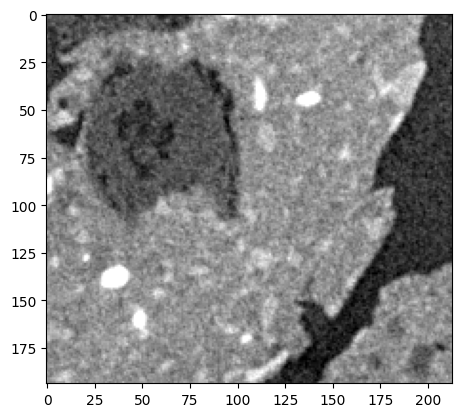

The image from data/08_soil_and_roots_8bit_2.png was loaded successfully.


In [18]:
# Ensure images display in the Jupyter notebook as static image, interactive widget or in a seperate window. [inline, widget, qt]
%matplotlib inline

# load the image used for the exercise and show it
image_raw = load_and_show_image(path="")

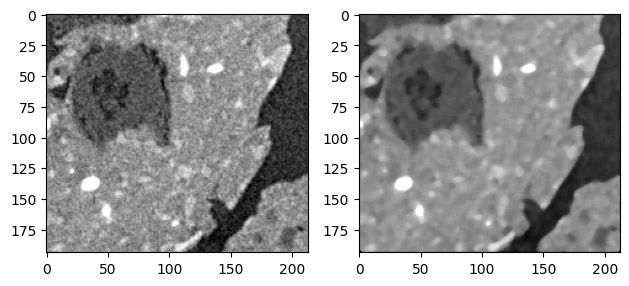

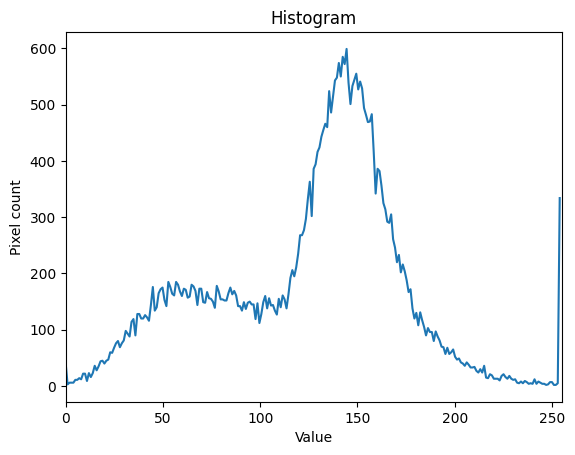

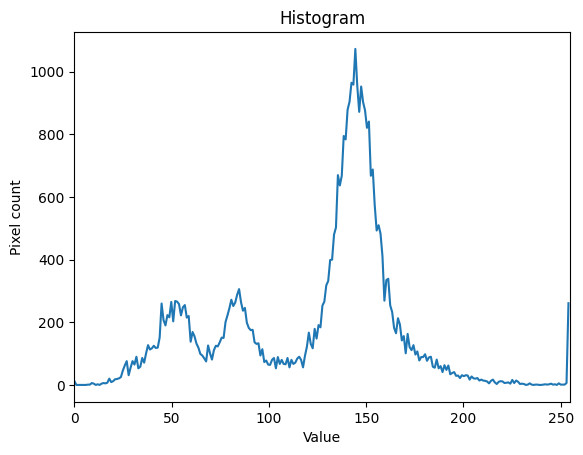

In [19]:
image_median = median_filter(, )

# Plot the figures raw and median filtered
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(image_median, cmap="gray")
fig.tight_layout()

# Plot the histograms
show_histogram(image=)
show_histogram(image=)

Write a function that will threshold an input image within the range specified as input to the function.

In [20]:
def threshold(image, low_thresh, up_thresh):
    """Applies a threshold to a given image.

    Args:
        image(numpy.ndarray): Image to be thresholded
        low_thresh(scalar): Value of lower threshold
        up_thresh(scalar): Value of upper threshold

    Returns:
        numpy.ndarray: Thresholded image
    """
    img_back = np.zeros((image.shape))
    img_back2 = np.zeros((image.shape))
    img_back[np.where(image)] = 1
    img_back2[np.where()] = 1
    img_back = img_back * img_back2

    return img_back

You should see four peaks in the histogram of the filtered image. Apply the thresholding function for each of these peaks and plot the resulting images, as well as the input image, next to each other. Give each image a detail of what it represents.

Play around with the performance of different image filters and kernel sizes and the regions you can subsequently segment using thresholding.

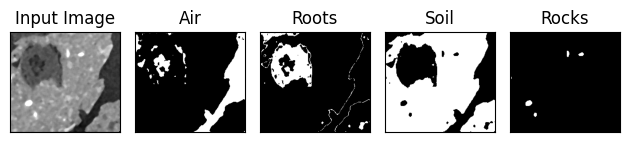

In [21]:
out = threshold(image_median, 0, 69)
out2 = threshold(image_median, 70, 100)
out3 = threshold(image_median, 101, 251)
out4 = threshold(image_median, 252, 255)
plt.subplot(151), plt.imshow(image_median, cmap="gray")
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(out, cmap="gray")
plt.title("Air"), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(out2, cmap="gray")
plt.title("Roots"), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(out3, cmap="gray")
plt.title("Soil"), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(out4, cmap="gray")
plt.title("Rocks"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

#### First order edge detection

In **first order edge detection**, the gradient image of the original image is determined and local maxima are then identified. The resulting edge image may either be binary, i.e. already a thresholded version of the local maxima, depending on which step height should be included, or a greyscale image where each greyscale corresponds to the magnitude of the maximum.

Because the process of implementing such a filter is complex, have a look [here](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123)
and try to implement the filter and workflow given there in order to **finally retrieve the edges** between **the soil and the air** and **the roots and the soil**.

In [22]:
from scipy import ndimage


def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return (G, theta)


def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = D * 180.0 / np.pi
    angle[angle < 0] += 180

    for i in range(1, M - 1):
        for j in range(1, N - 1):
            try:
                q = 255
                r = 255

                # angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = img[i, j + 1]
                    r = img[i, j - 1]
                # angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = img[i + 1, j - 1]
                    r = img[i - 1, j + 1]
                # angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = img[i + 1, j]
                    r = img[i - 1, j]
                # angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = img[i - 1, j - 1]
                    r = img[i + 1, j + 1]

                if (img[i, j] >= q) and (img[i, j] >= r):
                    Z[i, j] = img[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z

In [23]:
def threshold_edge(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio
    M, N = img.shape
    res = np.zeros((M, N), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res, weak, strong)

In [24]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            if img[i, j] == weak:
                try:
                    if (
                        (img[i + 1, j - 1] == strong)
                        or (img[i + 1, j] == strong)
                        or (img[i + 1, j + 1] == strong)
                        or (img[i, j - 1] == strong)
                        or (img[i, j + 1] == strong)
                        or (img[i - 1, j - 1] == strong)
                        or (img[i - 1, j] == strong)
                        or (img[i - 1, j + 1] == strong)
                    ):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

C:\Users\carst\AppData\Local\Temp\ipykernel_13700\906941554.py:8: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Ix = ndimage.filters.convolve(img, Kx)
C:\Users\carst\AppData\Local\Temp\ipykernel_13700\906941554.py:9: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Iy = ndimage.filters.convolve(img, Ky)


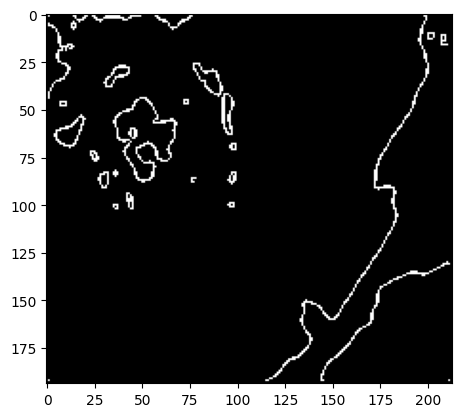

In [25]:
soil_all = out2 + out3 + out4
soil_sobel, theta = sobel_filters(soil_all)
soil_max = non_max_suppression(soil_sobel, theta)
soil_edge, weak, strong = threshold_edge(
    soil_max, lowThresholdRatio=0.05, highThresholdRatio=0.09
)
soil_air = hysteresis(soil_edge, weak, strong=255)
plt.figure()
plt.imshow(soil_air, cmap="gray")

---
### Morphological operators

To easily clean up our image, we can use **morphological operators**, such as **erosion and dilation**. In the following, you should implement these as functions that take the binarized image and the kernel size for the (quadratric) operator as input and output the processed image.
Keep in mind that **you need to consider the image edges differently than during filtering**, i.e. padding may not be appropriate.

#### Erosion operator

First, write a function to apply an erosion operator.

In [26]:
def erosion_op(image, filter_size):
    """Applies erosion operator to a given binary image.

    Args:
        image(numpy.ndarray): Image to be processed, should contain only 0 and 1
        filter_size(numpy.ndarray): Size of kernel
    Returns:
        numpy.ndarray: Filtered image
    """
    img_final = np.zeros((image.shape))
    a = np.where(image == 1)[0]
    b = np.where(image == 1)[1]

    for i in range(0, a.shape[0]):
        temp = np.zeros((filter_size, filter_size))
        if a[i] - filter_size // 2 < 0:
            if b[i] - filter_size // 2 < 0:
                temp = image[
                    0 : a[i] + filter_size // 2 + 1, 0 : b[i] + filter_size // 2 + 1
                ]
            else:
                temp = image[
                    0 : a[i] + filter_size // 2 + 1,
                    b[i] - filter_size // 2 : b[i] + filter_size // 2 + 1,
                ]
        elif b[i] - filter_size // 2 < 0:
            temp = image[
                a[i] - filter_size // 2 : a[i] + filter_size // 2 + 1,
                0 : b[i] + filter_size // 2 + 1,
            ]
        elif a[i] + filter_size // 2 > image.shape[0]:
            if b[i] + filter_size // 2 > image.shape[1]:
                temp = image[a[i] - filter_size // 2 : -1, b[i] - filter_size // 2 : -1]
            else:
                temp = image[
                    a[i] - filter_size // 2 : -1,
                    b[i] - filter_size // 2 : b[i] + filter_size // 2,
                ]
        elif b[i] + filter_size // 2 > image.shape[1]:
            temp = image[
                a[i] - filter_size // 2 : a[i] + filter_size // 2 + 1,
                b[i] - filter_size // 2 : -1,
            ]
        else:
            temp = image[
                a[i] - filter_size // 2 : a[i] + filter_size // 2 + 1,
                b[i] - filter_size // 2 : b[i] + filter_size // 2 + 1,
            ]
        if 0 in temp:
            img_final[a[i]][b[i]] = 1
    img_final = image - img_final

    return img_final

Apply the erosion operator to the thresholded image of the root with different kernel sizes and comment on how the image changes.

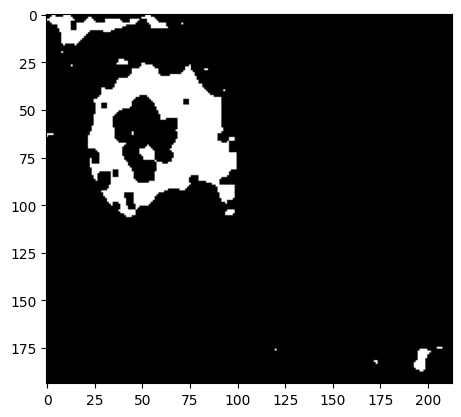

In [27]:
erode_root = erosion_op(, )
plt.imshow(erode_root, cmap="gray")
plt.show()

#### Dilation

Now write a function for a dilation operator.

In [28]:
def dilation_op(image, filter_size):
    """Applies dilation operator to a given binary image.

    Args:
        image(numpy.ndarray): Image to be processed, should contain only 0 and 1
        filter_size(numpy.ndarray): Size of kernel
    Returns:
        numpy.ndarray: Filtered image
    """

    img_final = np.zeros((image.shape))
    a = np.where(image == 0)[0]
    b = np.where(image == 0)[1]

    for i in range(0, a.shape[0]):
        temp = np.zeros((filter_size, filter_size))
        if a[i] - filter_size // 2 < 0:
            if b[i] - filter_size // 2 < 0:
                temp = image[
                    0 : a[i] + filter_size // 2 + 1, 0 : b[i] + filter_size // 2 + 1
                ]
            else:
                temp = image[
                    0 : a[i] + filter_size // 2 + 1,
                    b[i] - filter_size // 2 : b[i] + filter_size // 2 + 1,
                ]
        elif b[i] - filter_size // 2 < 0:
            temp = image[
                a[i] - filter_size // 2 : a[i] + filter_size // 2 + 1,
                0 : b[i] + filter_size // 2 + 1,
            ]
        elif a[i] + filter_size // 2 > image.shape[0]:
            if b[i] + filter_size // 2 > image.shape[1]:
                temp = image[a[i] - filter_size // 2 : -1, b[i] - filter_size // 2 : -1]
            else:
                temp = image[
                    a[i] - filter_size // 2 : -1,
                    b[i] - filter_size // 2 : b[i] + filter_size // 2,
                ]
        elif b[i] + filter_size // 2 > image.shape[1]:
            temp = image[
                a[i] - filter_size // 2 : a[i] + filter_size // 2 + 1,
                b[i] - filter_size // 2 : -1,
            ]
        else:
            temp = image[
                a[i] - filter_size // 2 : a[i] + filter_size // 2 + 1,
                b[i] - filter_size // 2 : b[i] + filter_size // 2 + 1,
            ]
        if 1 in temp:
            img_final[a[i]][b[i]] = 1
    img_final = image + img_final

    return img_final

Apply the dilation operator to the eroded image of the root with different kernel sizes and comment on how the image changes.

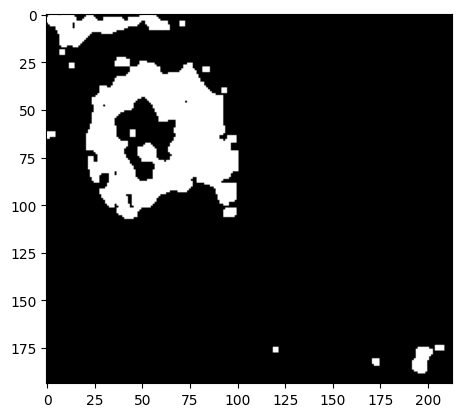

In [29]:
dil_root = dilation_op(, )
plt.imshow(dil_root, cmap="gray")
plt.show()

Now plot original image next to the eroded and dilated one, as well as a dilated and eroded one. What differences do you see between the images if you apply kernel sizes of 3 and 5?

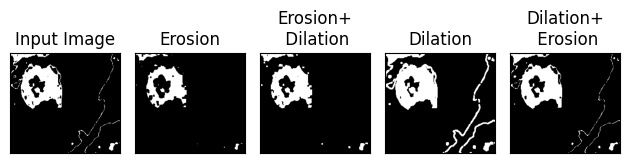

In [30]:
dil_root2 = dilation_op(, )
erode_root2 = erosion_op(, )
plt.figure()
plt.subplot(151), plt.imshow(out2, cmap="gray")
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(erode_root, cmap="gray")
plt.title("Erosion"), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(dil_root, cmap="gray")
plt.title("Erosion+\n Dilation"), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(dil_root2, cmap="gray")
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(erode_root2, cmap="gray")
plt.title("Dilation+\n Erosion"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

**Comment:**  
The images show clearly, that the order in which dilation and erosion operator are applied influences the outcome significantly. If we first perform an erosion, we get rid of thin structures, such as the edges and we increase holes present in the root for example. By then applying the dilation operation, we close these holes again and bring the structures back to their original size, while the undesired edges remain removed. By contrast, if we first perform a dilation, then all structures are magnified and holes present in the root are closed. The subsequent erosion shrinks the structures, but any holes that have been closed remain so and the edges are still present in the figure. 
Based on this observation it is apparent, why the _opening_ operation is an erosion followed by a dilation and why the _closing_ operation is a dilation followed by an erosion.

---
### Distance transform

Use the ``scipy`` distance transform ``distance_transform_ed`` and try to recreate the workflow shown in the lecture.
Starting with the original image ``08_soil_and_roots_8bit_2.png``, filter it, threshold the soil and the root, try to clean the image as musch as possible and apply the distance transform to both images and by multiplying the output obtain the final image where you will have the distance to the root in all soil pixel.
Plot the different intermediate outputs.

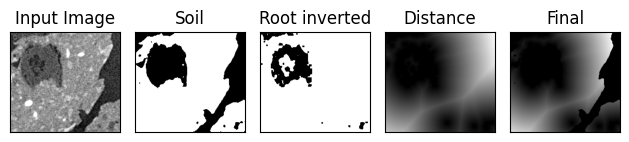

In [16]:
root = threshold(image_median, 70, 100)
soil = threshold(image_median, 101, 255)
erode_root = erosion_op(root, 3)
dil_root = dilation_op(erode_root, 3)
root_inv = np.ones(root.shape) - dil_root
dist_root = distance_transform_edt(root_inv)
soil_dist_root = soil * dist_root

plt.figure()
plt.subplot(151), plt.imshow(image_raw, cmap="gray")
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(soil, cmap="gray")
plt.title("Soil"), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(root_inv, cmap="gray")
plt.title("Root inverted"), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(dist_root, cmap="gray")
plt.title("Distance"), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(soil_dist_root, cmap="gray")
plt.title("Final"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

---